In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys, os, time
# add the parent directory to the paths
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import UltraCube as UCube

The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.


Make an small test region from NGC 1333

In [2]:
from spectral_cube import SpectralCube
if False:
    fpath = "/Users/mcychen/Documents/Data/GAS_NH3/DR1_rebase3/NGC1333/NGC1333_NH3_11_DR1_rebase3_trim.fits"
    ngc1333 = SpectralCube.read(fpath)
    nsmall = ngc1333[:, 210:221, 80:91]
    wpath = "/Users/mcychen/Desktop/UCube_Test/ngc1333_test_cube.fits"
    nsmall.write(wpath, overwrite=True)
    plt.imshow(np.nansum(nsmall._data,axis=0), origin='lower')

Make a small test region from Orion A

In [3]:
fpath = "/Users/mcychen/Documents/Data/GAS_NH3/DR1_rebase3/OrionA_N/OrionA_N_NH3_11_DR1_rebase3_trim.fits"
wpath = "/Users/mcychen/Desktop/UCube_Test/orionA_test_cube.fits"
if False:
    orion = SpectralCube.read(fpath)
    osmall = orion[:, 236:270, 123:145]
    osmall.write(wpath, overwrite=True)
    plt.imshow(np.nansum(osmall._data,axis=0), origin='lower')

Load the cube

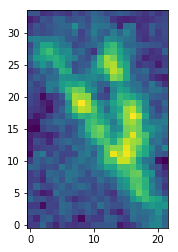

In [4]:
reload(UCube)
orion = UCube.UltraCube(wpath)
plt.imshow(np.nansum(orion.cube._data,axis=0), origin='lower')

Convolve the cube

In [5]:
dirName = "/Users/mcychen/Desktop/UCube_Test/"
cube_cnv_name = "{}/orionA_test_cube_conv2Xbeam.fits".format(dirName)
if False:
    dirName = "/Users/mcychen/Desktop/UCube_Test/"
    #orion.fit_cube(ncomp=[1,2], mask_function=None, snr_min=18)
    cube_cnv_name = "{}/orionA_test_cube_conv2Xbeam.fits".format(dirName)
    #ucube.convolve_sky_byfactor(b59.cube, 2, cube_cnv_name, edgetrim_width=None)
    orion.convolve_cube(factor=2, savename=cube_cnv_name, edgetrim_width=None)

Load, fit, and save the convolved cube

In [6]:
orion_cnv = UCube.UltraCube(cube_cnv_name)
paraDir = '{}/paramaps'.format(dirName)
if False:
    orion_cnv.fit_cube(ncomp=[1,2], snr_min=3)
    UCube.save_model_fit(orion_cnv.pcubes['1'], '{}/orionA_test_para_1vcomp_conv2Xbeam.fits'.format(paraDir), 1)
    UCube.save_model_fit(orion_cnv.pcubes['2'], '{}/orionA_test_para_2vcomp_conv2Xbeam.fits'.format(paraDir), 2)

Load the fitted model

In [7]:
orion_cnv.load_model_fit('{}/orionA_test_para_1vcomp_conv2Xbeam.fits'.format(paraDir), 1)
orion_cnv.load_model_fit('{}/orionA_test_para_2vcomp_conv2Xbeam.fits'.format(paraDir), 2)
mod1 = orion_cnv.pcubes['1'].get_modelcube()
mod2 = orion_cnv.pcubes['2'].get_modelcube()

INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,762 [pyspeckit.spectrum.interactive]
INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,762 [pyspeckit.spectrum.interactive]


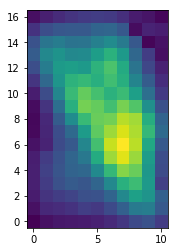

In [8]:
plt.imshow(np.nansum(mod2,axis=0), origin = 'lower')

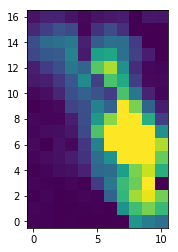

In [9]:
lnk21 = orion_cnv.get_AICc_likelihood(2, 1)
plt.imshow(lnk21, origin="lower", vmin=0, vmax=1000)

In [10]:
p2 = orion_cnv.pcubes['2']

In [11]:
def show_para(para, figsize=(11, 8)):
    npanel = para.shape[0]
    fig = plt.figure(figsize=figsize)
    
    for i, p in enumerate(para):
        ax = fig.add_subplot(1, npanel, i+1)
        vmin = np.percentile(p[np.isfinite(p)], 1)
        vmax = np.percentile(p[np.isfinite(p)], 99) 
        ax.imshow(p, origin='lower', vmin=vmin, vmax=vmax)

Exame the interpolation

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


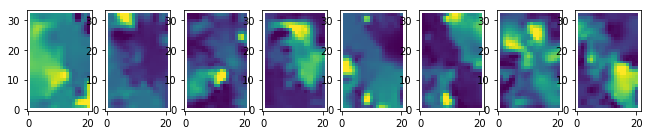

In [12]:
import guess_refine as gf
reload(gf)
data_cnv = np.append(p2.parcube, p2.errcube, axis=0)
guesses_final = gf.guess_from_cnvpara(data_cnv, orion_cnv.cube.header, orion.cube.header)
show_para(guesses_final)

Compare that with the raw fitted results

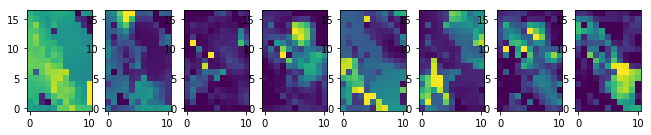

In [13]:
show_para(p2.parcube)

fit full resolution using convolved fit results

In [14]:
# elapsed time 91.6 seconds, 741 pixels
if False:
    p1 = orion_cnv.pcubes['1']
    data_cnv = np.append(p1.parcube, p1.errcube, axis=0)
    guesses = gf.guess_from_cnvpara(data_cnv, orion_cnv.cube.header, orion.cube.header)
    orion.fit_cube(ncomp=[1], snr_min=3, guesses = guesses)
    


In [15]:
# Elapsed time was 440.1 seconds
if False:
    p2 = orion_cnv.pcubes['2']
    data_cnv = np.append(p2.parcube, p2.errcube, axis=0)
    guesses = gf.guess_from_cnvpara(data_cnv, orion_cnv.cube.header, orion.cube.header)
    orion.fit_cube(ncomp=[2], snr_min=3, guesses = guesses)

In [16]:
paraDir = '{}/paramaps'.format(dirName)
if False:
    UCube.save_model_fit(orion.pcubes['1'], '{}/orionA_test_para_1vcomp.fits'.format(paraDir), 1)
    UCube.save_model_fit(orion.pcubes['2'], '{}/orionA_test_para_2vcomp.fits'.format(paraDir), 2)

In [17]:
orion.load_model_fit('{}/orionA_test_para_1vcomp.fits'.format(paraDir), 1)
orion.load_model_fit('{}/orionA_test_para_2vcomp.fits'.format(paraDir), 2)

INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,762 [pyspeckit.spectrum.interactive]


invalid value encountered in greater


INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,762 [pyspeckit.spectrum.interactive]


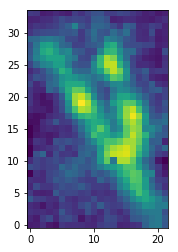

In [18]:
mod1 = orion.pcubes['1'].get_modelcube()
mod2 = orion.pcubes['2'].get_modelcube()
plt.imshow(np.nansum(mod2, axis=0), origin='lower')

Use the max residual snr mask instead!

In [19]:
mask = lnk21 > 5
modbest = mod1.copy()
modbest[:,mask] = mod2[:,mask]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 34 but corresponding boolean dimension is 17

Get the residual of the best model, and their corrosponding rms

In [ ]:
modbest[np.isnan(modbest)] = 0
best_res = orion.cube._data - modbest
best_rms = UCube.get_rms(best_res)

In [ ]:
import moment_guess as mmg
reload(mmg)
from spectral_cube import SpectralCube
from astropy import units as u

wdw_wth=4.0

res_cube = SpectralCube(best_res, orion.cube.wcs)
res_cube = res_cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
res_main_hf = mmg.get_window_slab(res_cube, window_hwidth=wdw_wth, v_atpeak=np.nanmedian(orion.pcubes['1'].parcube[0]))

res_main_hf_snr = np.nanmax(res_main_hf, axis=0)/best_rms

plt.imshow(res_main_hf_snr, origin = 'lower')
plt.contour(res_main_hf_snr, [3], colors='1')

Maskout where residual is significant

In [ ]:
mask_res = res_main_hf_snr > 5
mask_res = dilation(mask_res)
plt.imshow(mask_res, origin='lower')

In [ ]:
res_main_hf = res_main_hf.with_spectral_unit(u.km/u.s,velocity_convention='radio')
mom0 = res_main_hf.moment0()
plt.imshow(mom0.value/best_rms, origin = 'lower')  

In [ ]:
from spectral_cube import SpectralCube

# make sure the cube_res variable does not point to a pre-existing spectral cube
if 'cube_res' in globals():
    del cube_res
cube_res = SpectralCube(data=best_res, wcs=orion.pcubes['2'].wcs.copy(), header=orion.pcubes['2'].header.copy())
cube_res_masked = cube_res.with_mask(~mask_res)

In [ ]:
import convolve_tools as cnvtool
reload(cnvtool)
cube_res_cnv = cnvtool.convolve_sky_byfactor(cube_res_masked, factor=2, edgetrim_width=5, snrmasked=False, iterrefine=False)

In [ ]:
cube_res_cnv = cube_res_cnv.with_spectral_unit(u.km/u.s,velocity_convention='radio')

wdw_wth=3.0
ncomp=1
moms_res_cnv = mmg.window_moments(cube_res_cnv, window_hwidth=wdw_wth,
                                  v_atpeak=np.nanmedian(orion.pcubes['1'].parcube[0]))
gg = mmg.moment_guesses(moms_res_cnv[1], moms_res_cnv[2], ncomp, moment0=moms_res_cnv[0])

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(moms_res_cnv[0], origin='lower')
ax1 = fig.add_subplot(132)
ax1.imshow(moms_res_cnv[1], origin='lower', vmin=6, vmax=13, cmap='Spectral')
ax2 = fig.add_subplot(133)
ax2.imshow(moms_res_cnv[2], origin='lower', vmin=0, vmax=3, cmap='magma')

In [ ]:
plt.imshow(gg[0], origin='lower', vmin=6, vmax=13, cmap='Spectral')
np.nanmax(gg[0])

In [ ]:
orion_cnv_rez = UCube.UltraCube(cube=cube_res_cnv)
orion_cnv_rez.fit_cube(ncomp=[1], snr_min=3, guesses=gg)


plot the residual model

In [ ]:
rez_mod_cnv_1 = orion_cnv_rez.pcubes['1'].get_modelcube()
plt.imshow(np.nanmax(rez_mod_cnv_1, axis=0), origin='lower')

In [ ]:
rez_par_cnv_1 = orion_cnv_rez.pcubes['1'].parcube

In [ ]:
plt.imshow(orion_cnv_rez.get_AICc_likelihood(1,0), origin='lower')
plt.contour(orion_cnv_rez.get_AICc_likelihood(1,0), [5], colors='1')

In [ ]:
aic1v0_mask = orion_cnv_rez.get_AICc_likelihood(1,0) > 5
aic1v0_mask_dil = dilation(aic1v0_mask)
plt.imshow(aic1v0_mask_dil, origin='lower')

In [ ]:
plt.imshow(rez_par_cnv_1[0]*aic1v0_mask, origin='lower', vmin=6, vmax=13, cmap='Spectral')
print np.nanmax(rez_par_cnv_1[0]), np.nanmin(rez_par_cnv_1[0])

In [ ]:
plt.imshow(rez_par_cnv_1[0], origin='lower')

In [ ]:
ff_mask = cnvtool.regrid_mask(aic1v0_mask, hdr2D_cnv, hdr2D, tightBin=False)
#ff_mask = cnvtool.regrid_mask(aic1v0_mask_dil, hdr2D_cnv, hdr2D, tightBin=False) 
#plt.imshow(ff_mask,origin='lower')
funk = ff_mask.copy()
funk = funk.astype(float)
funk[funk == 0] = np.nan
plt.imshow(guesses_final[0]*funk, origin='lower', vmin=6, vmax=13, cmap='Spectral')


print np.nanmin(guesses_final[0]),np.nanmedian(guesses_final[0]), np.nanmax(guesses_final[0])

In [ ]:
plt.imshow(guesses_final[0], origin='lower', vmin=6, vmax=13, cmap='Spectral')

In [ ]:
plt.imshow(guesses_final[1], origin='lower', vmin=0, vmax=1, cmap='magma')

In [ ]:
reload(gf)
data_cnv = np.append(orion_cnv_rez.pcubes['1'].parcube, orion_cnv_rez.pcubes['1'].errcube, axis=0)
preguess = data_cnv.copy()
preguess[:,~aic1v0_mask] = np.nan
#preguess[:,~aic1v0_mask_dil] = np.nan



guesses_final = gf.guess_from_cnvpara(preguess, orion_cnv.cube.header, orion.cube.header, mask=aic1v0_mask_dil)
show_para(guesses_final)

In [ ]:
show_para(orion_cnv_rez.pcubes['1'].parcube)

In [ ]:
np.nanmax(rez_par_cnv_1[0])

In [ ]:
cube_res_cnv = cube_res_cnv.with_spectral_unit(u.km/u.s,velocity_convention='radio')
plt.plot(cube_res_cnv.spectral_axis, np.nansum(cube_res_cnv._data, axis=(1,2)), c='0.7')
plt.plot(cube_res_cnv.spectral_axis, np.nansum(orion.cube._data, axis=(1,2))/100, linewidth=3)
plt.plot(cube_res_cnv.spectral_axis, np.nansum(modbest, axis=(1,2))/100)

voff_wind = 4
plt.xlim((7.8-voff_wind, 7.8+voff_wind))
np.nanmedian(orion.pcubes['1'].parcube[0])

A quick demonstration that moment estimate is not good to check the residual as well, compared to peak SNR of the residual.

In [ ]:
pp1=orion_cnv_rez.pcubes['1']
pp1mod = pp1.get_modelcube()

In [ ]:
#pp1.plotter()
yyy = 8
pp1.plot_spectrum(3,yyy)
pp1.plot_fit(3,yyy)

In [ ]:
pp1.plot_spectrum(7,15)
pp1.plot_fit(7,15)

In [ ]:
pp1.plot_spectrum(2,11)
pp1.plot_fit(2,11)

In [ ]:
#orion.pcubes['1'].parcube.shape
fff_guesses = np.append(orion.pcubes['1'].parcube, guesses_final, axis=0)
lnk21 = orion.get_AICc_likelihood(2, 1)
fff_mask = lnk21<5
fff_mask = dilation(fff_mask)
plt.imshow(fff_mask, origin="lower")

In [ ]:
lnk10 = orion.get_AICc_likelihood(1, 0)
fff_mask = np.logical_and(fff_mask, lnk10>5)
plt.imshow(fff_mask, origin="lower")

In [ ]:
ffunk = fff_mask.astype(float)
ffunk[~fff_mask] = np.nan
show_para(fff_guesses*ffunk)


Try fitting two components again (361.4 seconds)

In [ ]:
if 'orion_new' in globals():
    del orion_new

orion_new = UCube.UltraCube(wpath)
if False:
    orion_new.fit_cube(ncomp=[2], maskmap=fff_mask, snr_min=3, guesses=fff_guesses)
    UCube.save_model_fit(orion_new.pcubes['2'], '{}/orionA_test_para_2vcomp_wideRcvy.fits'.format(paraDir), 2)
else:
    orion_new.load_model_fit('{}/orionA_test_para_2vcomp_wideRcvy.fits'.format(paraDir), 2)

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(np.nanmax(orion_new.pcubes['2'].get_modelcube(), axis=0), origin="lower")
ax1 = fig.add_subplot(132)
ax1.imshow(np.nanmax(orion.pcubes['2'].get_modelcube(), axis=0), origin="lower")

#plt.imshow(np.nanmax(orion_new.pcubes['2'].get_modelcube(), axis=0), origin='lower')

In [ ]:
lnk_NvsO = UCube.calc_AICc_likelihood(orion_new, 2, 2, ucube_B=orion)

In [ ]:
plt.imshow(lnk_NvsO>0, origin='lower')
#plt.imshow(lnk_NvsO, origin='lower', vmin=-5, vmax=5, cmap='Spectral')

In [ ]:
if 'orion_final' in globals():
    del orion_final
orion_final = UCube.UltraCube(wpath)
#orion_final.load_model_fit('{}/orionA_test_para_1vcomp.fits'.format(paraDir), 1)
#orion_final.load_model_fit('{}/orionA_test_para_2vcomp.fits'.format(paraDir), 2)
#orion_final.pcubes['1'] = orion.pcubes['1'].copy()
#orion_final.pcubes['2'] = orion.pcubes['2'].copy()

In [ ]:
pcube_final_2 = orion.pcubes['2'].copy('deep')

In [ ]:
def replace_para(pcube, pcube_ref, mask):
    pcube.parcube[:,mask] = pcube_ref.parcube[:,mask]
    pcube.errcube[:,mask] = pcube_ref.errcube[:,mask]

In [ ]:
#replace_para(orion_final.pcubes['2'], orion_new.pcubes['2'], lnk_NvsO>5)
# mask over where one comp fit is more robust
good_mask = np.logical_and(lnk_NvsO>0, lnk21<5)
plt.imshow(good_mask, origin='lower')

In [ ]:
replace_para(pcube_final_2, orion_new.pcubes['2'], good_mask)

In [ ]:
UCube.save_model_fit(pcube_final_2, '{}/orionA_test_para_2vcomp_final.fits'.format(paraDir), 2)
orion_final.load_model_fit('{}/orionA_test_para_1vcomp.fits'.format(paraDir), 1)
orion_final.load_model_fit('{}/orionA_test_para_2vcomp_final.fits'.format(paraDir), 2)

In [ ]:
#fffmod2 = orion_final.pcubes['2'].get_modelcube(update=True)

In [ ]:
#plt.imshow(np.nanmax(fffmod2, axis=0), origin='lower')

In [ ]:
lnk21_ff = orion_final.get_AICc_likelihood(2, 1)

In [ ]:
plt.imshow(lnk21_ff, origin='lower')

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(131)
ax0.imshow(lnk21>5, origin="lower")
ax1 = fig.add_subplot(132)
ax1.imshow(lnk21_ff>5, origin="lower")
ax2 = fig.add_subplot(133)
ax2.imshow((lnk21_ff>5)*1.0 + (lnk21>5)*1.0, origin="lower")